In [101]:
import pandas as pd
import numpy as np
df = pd.read_csv("Treasury Squeeze test - DS1.csv")
df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0,1,0,1,1,1,1,0,0,True
1,2,TUH93 Comdty,0,1,1,0,1,1,0,0,1,False
2,3,TUM93 Comdty,0,0,1,1,0,0,0,0,0,False
3,4,TUU93 Comdty,1,1,0,0,0,0,0,1,1,True
4,5,TUZ93 Comdty,0,0,1,1,1,1,1,0,0,False


In [102]:
df=df.drop(['rowindex', 'contract'], axis=1)
df.head()


,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,0,1,0,1,1,1,1,0,0,True
1,0,1,1,0,1,1,0,0,1,False
2,0,0,1,1,0,0,0,0,0,False
3,1,1,0,0,0,0,0,1,1,True
4,0,0,1,1,1,1,1,0,0,False


In [103]:
X=df.drop(['squeeze'],axis=1)
X.head()

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio
0,0,1,0,1,1,1,1,0,0
1,0,1,1,0,1,1,0,0,1
2,0,0,1,1,0,0,0,0,0
3,1,1,0,0,0,0,0,1,1
4,0,0,1,1,1,1,1,0,0


In [104]:
X.shape

(900, 9)

In [105]:
y=df['squeeze']
y.head()

0     True
1    False
2    False
3     True
4    False
Name: squeeze, dtype: bool

In [106]:
y.shape

(900,)

In [107]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=30)

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=3, criterion ='entropy', random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

[Text(558.0, 951.3000000000001, 'X[8] <= 0.5\nentropy = 0.99\nsamples = 675\nvalue = [378, 297]'),
 Text(279.0, 679.5, 'X[0] <= 0.5\nentropy = 0.911\nsamples = 340\nvalue = [229, 111]'),
 Text(139.5, 407.70000000000005, 'X[1] <= 0.5\nentropy = 0.788\nsamples = 161\nvalue = [123, 38]'),
 Text(69.75, 135.89999999999998, 'entropy = 0.548\nsamples = 87\nvalue = [76, 11]'),
 Text(209.25, 135.89999999999998, 'entropy = 0.947\nsamples = 74\nvalue = [47, 27]'),
 Text(418.5, 407.70000000000005, 'X[6] <= 0.5\nentropy = 0.975\nsamples = 179\nvalue = [106, 73]'),
 Text(348.75, 135.89999999999998, 'entropy = 1.0\nsamples = 83\nvalue = [41, 42]'),
 Text(488.25, 135.89999999999998, 'entropy = 0.908\nsamples = 96\nvalue = [65, 31]'),
 Text(837.0, 679.5, 'X[5] <= 0.5\nentropy = 0.991\nsamples = 335\nvalue = [149, 186]'),
 Text(697.5, 407.70000000000005, 'X[1] <= 0.5\nentropy = 0.991\nsamples = 178\nvalue = [99, 79]'),
 Text(627.75, 135.89999999999998, 'entropy = 0.948\nsamples = 90\nvalue = [57, 33]'),

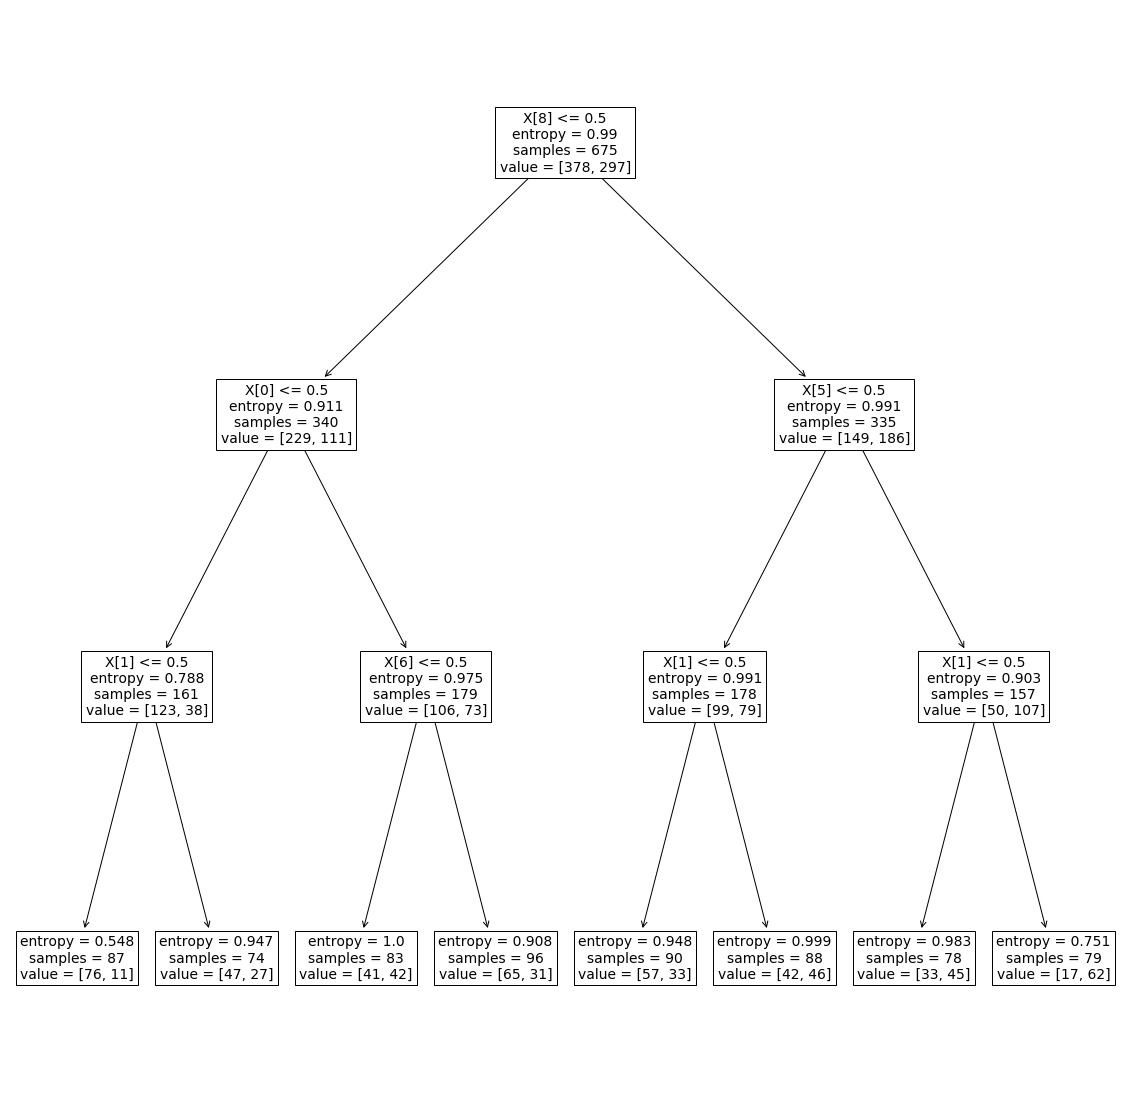

In [124]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))  # whatever size you want
tree.plot_tree(dt)


In [109]:
#Predict training set labels
y_pred_train=dt.predict(X_train)

# Predict test set labels
y_pred_test = dt.predict(X_test)

# Compute training set and test set accuracy 
acc_train = accuracy_score(y_pred_train, y_train)
acc_test= accuracy_score(y_pred_test, y_test)

print("Training set accuracy: {:.2f}".format(acc_train))
print("Test set accuracy: {:.2f}".format(acc_test))

Training set accuracy: 0.68
Test set accuracy: 0.67


In [110]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.71      0.79      0.75       138
        True       0.59      0.48      0.53        87

    accuracy                           0.67       225
   macro avg       0.65      0.64      0.64       225
weighted avg       0.66      0.67      0.66       225



In [111]:
print(confusion_matrix(y_test,y_pred_test))

[[109  29]
 [ 45  42]]


In [114]:

#try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores_train= []
scores_test=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    
    y_pred_train_knn=knn.predict(X_train)
    y_pred_test_knn = knn.predict(X_test)
        
    scores_train.append(metrics.accuracy_score(y_train, y_pred_train_knn))
    scores_test.append(metrics.accuracy_score(y_test, y_pred_test_knn))
    

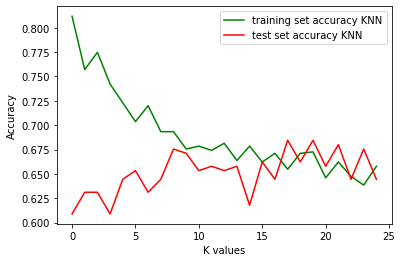

In [115]:
plt.plot(scores_train,"g",label = "training set accuracy KNN")
plt.plot(scores_test,"r", label = "test set accuracy KNN")
plt.legend()
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.show()